In [1]:
import os
import shutil
import random
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import shutil

import glob
from skimage.feature import hog # for feature extraction


from tensorflow.keras.preprocessing import image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\Alexso\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Alexso\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Alexso\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Alexso\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) o

In [30]:
img = cv2.imread('D:/Test/NewCrop/Normal/NORMAL 8.png', 0)

print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

Image Properties
- Number of Pixels: 34869
- Shape/Dimensions: (177, 197)


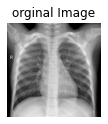

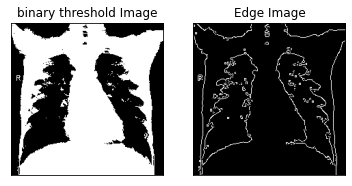

In [39]:

fig = plt.figure(figsize=(20,10))
# Read image
img = img

# Perform binary thresholding on the image with T = 125
r, threshold = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)
# cv2.imshow("threshold",threshold)
  
ax = fig.add_subplot(5, 2, 10)
plt.imshow(img, cmap = plt.cm.gray)
plt.title('orginal Image'), plt.xticks([]), plt.yticks([])
plt.axis("off")
# show the images
plt.show()

edges = cv2.Canny(threshold,100,200)
plt.subplot(121),plt.imshow(threshold,cmap = 'gray')
plt.title('binary threshold Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [40]:
import skimage.measure    
entropyimg = skimage.measure.shannon_entropy(img)
entropythreshold = skimage.measure.shannon_entropy(threshold)
entropyedges = skimage.measure.shannon_entropy(edges)


print(entropyimg)
print(entropythreshold)
print(entropyedges)
 

7.574456288067212
0.9798332677003223
0.2806290042786459


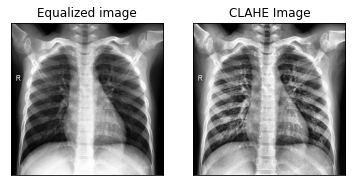

In [42]:
import cv2
from skimage import io
from matplotlib import pyplot as plt

img = cv2.imread("D:/Test/resized/vald/Normal/NORMAL 8.png", 1)
#img = cv2.imread('images/retina.jpg', 1)


#Converting image to LAB Color so CLAHE can be applied to the luminance channel
lab_img= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

#Splitting the LAB image to L, A and B channels, respectively
l, a, b = cv2.split(lab_img)

#plt.hist(l.flat, bins=100, range=(0,255))
###########Histogram Equlization#############
#Apply histogram equalization to the L channel
equ = cv2.equalizeHist(l)

#plt.hist(equ.flat, bins=100, range=(0,255))
#Combine the Hist. equalized L-channel back with A and B channels
updated_lab_img1 = cv2.merge((equ,a,b))

#Convert LAB image back to color (RGB)
hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)

###########CLAHE#########################
#Apply CLAHE to L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img = clahe.apply(l)
#plt.hist(clahe_img.flat, bins=100, range=(0,255))

#Combine the CLAHE enhanced L-channel back with A and B channels
updated_lab_img2 = cv2.merge((clahe_img,a,b))

#Convert LAB image back to color (RGB)
CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)


#cv2.imshow("Original image", img)
#cv2.imshow("Equalized image", hist_eq_img)
#cv2.imshow('CLAHE Image', CLAHE_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows() 

#plt.subplot(121),plt.imshow(img,cmap = 'gray')
#plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(121),plt.imshow(hist_eq_img,cmap = 'gray')
plt.title('Equalized image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(CLAHE_img,cmap = 'gray')
plt.title('CLAHE Image'), plt.xticks([]), plt.yticks([])

plt.show()

7.574456288067212
7.417694370034634


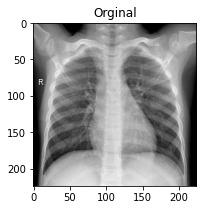

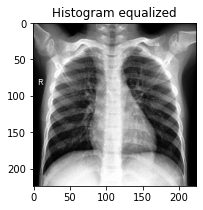

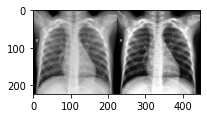

In [43]:
# creating a Histograms Equalization 
# of a image using cv2.equalizeHist() 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(img) 

# stacking images side-by-side 
equres = np.hstack((img, equ)) 

plt.figure(figsize=(3,3))
plt.title("Orginal")
plt.imshow(img,cmap = 'gray')

plt.figure(figsize=(3,3))
plt.title("Histogram equalized")
plt.imshow(equ,cmap = 'gray')

plt.figure(figsize=(3,3))
plt.imshow(equres,cmap = 'gray')

import skimage.measure    
entropyimg = skimage.measure.shannon_entropy(img)
entropyblur = skimage.measure.shannon_entropy(equ)

print(entropyimg)
print(entropyblur)

In [44]:
import imquality.brisque as brisque
from skimage import io, img_as_float
img0 = img_as_float(img)
img1 = img_as_float(equ)


score0 = brisque.score(img0)
score1 = brisque.score(img1)

print("BRISQUE Score for 0 blur = ", score0)
print("BRISQUE Score for 1 blur = ", score1)

BRISQUE Score for 0 blur =  -0.3485629046600991
BRISQUE Score for 1 blur =  -0.031278045144432554


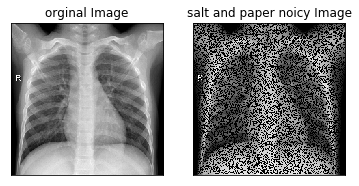

In [8]:
img_gs = img
# Adding salt & pepper noise to an image
def salt_pepper(prob):
    # Extract image dimensions
    row, col = img_gs.shape
    
    # Declare salt & pepper noise ratio
    s_vs_p = 0.5
    output = np.copy(img_gs)
    
    # Apply salt noise on each pixel individually
    num_salt = np.ceil(prob * img_gs.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in img_gs.shape]
    output[coords] = 1
    
    # Apply pepper noise on each pixel individually
    num_pepper = np.ceil(prob * img_gs.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in img_gs.shape]
    
    output[coords] = 0 
    return output

# Call salt & pepper function with probability = 0.5
# on the grayscale image of rose
sp_05 = salt_pepper(0.5)

# Store the resultant image as 'sp_05.jpg'
saltandpaperimage=sp_05
plt.subplot(121),plt.imshow(img_gs,cmap = 'gray')
plt.title('orginal Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(saltandpaperimage,cmap = 'gray')
plt.title('salt and paper noicy Image'), plt.xticks([]), plt.yticks([])

plt.show()



---Effects on S&P Noise Image with Probability 0.5---




True

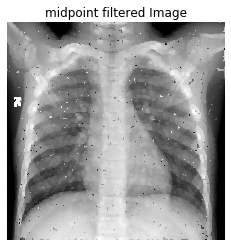

In [9]:
from scipy.ndimage import maximum_filter, minimum_filter

def midpoint(img):
    maxf = maximum_filter(img, (3, 3))
    minf = minimum_filter(img, (3, 3))
    midpoint = (maxf + minf) / 2
    ax = fig.add_subplot(5, 2, 10)
    plt.imshow(midpoint, cmap = plt.cm.gray)
    plt.title('midpoint filtered Image'), plt.xticks([]), plt.yticks([])
    plt.axis("off")
    # show the images
    return midpoint
plt.show()

print("\n\n---Effects on S&P Noise Image with Probability 0.5---\n\n")
midpointfilteredimage=midpoint(sp_05)
cv2.imwrite('midpointfilteredimage.png'.format(image), midpointfilteredimage)

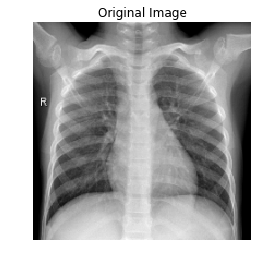

Please select the noise to join:
Gaussian Noise - 1
Salt and Pepper Noise - 2
2


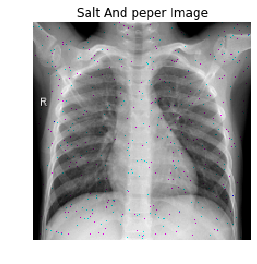

Please select a filter:
Arithmetic mean filtering - a
Geometric mean filter - b
Harmonic mean filter - c
Inverse harmonic mean filter - d
d


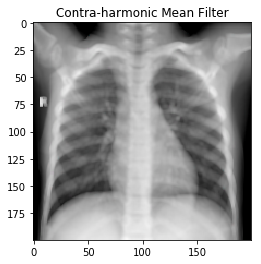

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import random

def GaussieNoisy(image,sigma):
    # Gaussian noise
    img = image.astype(np.int16)  # This step is to avoid the situation where the pixels are less than 0 and greater than 255
    mu = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                img[i, j, k] = img[i, j, k] + random.gauss(mu=mu, sigma=sigma)
    img[img > 255] = 255
    img[img < 0] = 0
    img = img.astype(np.uint8)
    return img

def spNoisy(image,s_vs_p = 0.5,amount = 0.004):
    # Salt and pepper noise
    out = np.copy(image)
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[tuple(coords)] = 1
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[tuple(coords)] = 0
    return out

def ArithmeticMeanAlogrithm(image):
    # Arithmetic mean filtering
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1] = np.mean(image[i-1:i+2,j-1:j+2])
    new_image = (new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)
def rgbArithmeticMean(image):
    r,g,b = cv2.split(image)
    r = ArithmeticMeanAlogrithm(r)
    g = ArithmeticMeanAlogrithm(g)
    b = ArithmeticMeanAlogrithm(b)
    return cv2.merge([r,g,b])


def GeometricMeanOperator(roi):
    roi = roi.astype(np.float64)
    p = np.prod(roi)
    return p ** (1 / (roi.shape[0] * roi.shape[1]))
def GeometricMeanAlogrithm(image):
    # Geometric mean filter
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_DEFAULT)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            new_image[i - 1, j - 1] = GeometricMeanOperator(image[i - 1:i + 2, j - 1:j + 2])
    new_image = (new_image - np.min(image)) * (255 / np.max(image))
    return new_image.astype(np.uint8)
def rgbGemotriccMean(image):
    r,g,b = cv2.split(image)
    r = GeometricMeanAlogrithm(r)
    g = GeometricMeanAlogrithm(g)
    b = GeometricMeanAlogrithm(b)
    return cv2.merge([r,g,b])


def HarmonicMeanOperator(roi):
    roi = roi.astype(np.float64)
    if 0 in roi:
        roi = 0
    else:
        roi = scipy.stats.hmean(roi.reshape(-1))
    return roi
def HarmonicMeanAlogrithm(image):
    # Harmonic mean filter
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1] =HarmonicMeanOperator(image[i-1:i+2,j-1:j+2])
    new_image = (new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)
def rgbHarmonicMean(image):
    r,g,b = cv2.split(image)
    r = HarmonicMeanAlogrithm(r)
    g = HarmonicMeanAlogrithm(g)
    b = HarmonicMeanAlogrithm(b)
    return cv2.merge([r,g,b])


def Contra_harmonicMeanOperator(roi,q):
    roi = roi.astype(np.float64)
    return np.mean((roi)**(q+1))/np.mean((roi)**(q))
def Contra_harmonicMeanAlogrithm(image,q):
    # Inverse harmonic mean filter
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1] = Contra_harmonicMeanOperator(image[i-1:i+2,j-1:j+2],q)
    new_image = (new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)
def rgbContra_harmonicMean(image,q):
    r,g,b = cv2.split(image)
    r = Contra_harmonicMeanAlogrithm(r,q)
    g = Contra_harmonicMeanAlogrithm(g,q)
    b = Contra_harmonicMeanAlogrithm(b,q)
    return cv2.merge([r,g,b])

if __name__ == '__main__':
    house = cv2.imread("D:/Test/resized/vald/Normal/NORMAL 8.png")
    house = cv2.resize(cv2.cvtColor(house, cv2.COLOR_BGR2RGB), (200, 200))
    plt.imshow(house)
    plt.axis("off")
    plt.title("Original Image")
    plt.show()   # Original image

    flagN = input("Please select the noise to join:\n"
                  "Gaussian Noise - 1\n"
                  "Salt and Pepper Noise - 2\n")

    if flagN == "1":
        GuassHouse = GaussieNoisy(house,18)
        plt.imshow(GuassHouse)
        plt.axis("off")
        plt.title("Gauss noise Image")
        plt.show()   # The image after adding Gaussian noise
    elif flagN == "2":
        spHouse = spNoisy(house)
        plt.imshow(spHouse)
        plt.axis("off")
        plt.title("Salt And peper Image")
        plt.show()  # The image after adding salt and pepper noise


    flagF = input("Please select a filter:\n"
                  "Arithmetic mean filtering - a\n"
                  "Geometric mean filter - b\n"
                  "Harmonic mean filter - c\n"
                  "Inverse harmonic mean filter - d\n")

    if flagF == "a":
        if flagN == "1":
            plt.imshow(rgbArithmeticMean(GuassHouse))
        elif flagN == "2":
            plt.imshow(rgbArithmeticMean(spHouse))
        plt.title("Arithmetic Mean Filter")
        plt.show()  # Arithmetic Mean Filter
    elif flagF == "b":
        if flagN == "1":
            plt.imshow(rgbGemotriccMean(GuassHouse))
        elif flagN == "2":
            plt.imshow(rgbGemotriccMean(spHouse))
        plt.title("Geometric Mean Filter")
        plt.show()  # Geometric Mean Filter
    elif flagF == "c":
        if flagN == "1":
            plt.imshow(rgbHarmonicMean(GuassHouse))
        elif flagN == "2":
            plt.imshow(rgbHarmonicMean(spHouse))
        plt.title("Harmonic Mean Filter")
        plt.show()  # Harmonic Mean Filter
    elif flagF == "d":
        if flagN == "1":
            plt.imshow(rgbContra_harmonicMean(GuassHouse,2))
        elif flagN == "2":
            plt.imshow(rgbContra_harmonicMean(spHouse,2))
        plt.title("Contra-harmonic Mean Filter")
        plt.show()  # Contra-harmonic Mean Filter

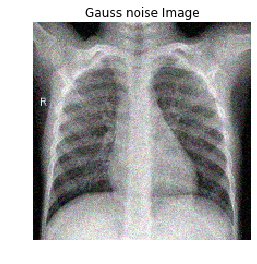

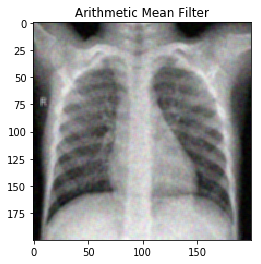

In [13]:
def ArithmeticMeanAlogrithm(img):
    
    # Arithmetic mean filtering
    new_image = np.zeros(img.shape)
    img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            new_image[i-1,j-1] = np.mean(img[i-1:i+2,j-1:j+2])
    new_image = (new_image-np.min(img))*(255/np.max(img))
    return new_image.astype(np.uint8)
GuassHouse = GaussieNoisy(house,18)
plt.imshow(GuassHouse)
plt.axis("off")
plt.title("Gauss noise Image")
plt.show()   # The image after adding Gaussian noise
plt.imshow(rgbArithmeticMean(GuassHouse))
#plt.imshow(rgbArithmeticMean(spHouse))
plt.title("Arithmetic Mean Filter")
plt.show()  # Arithmetic Mean Filter


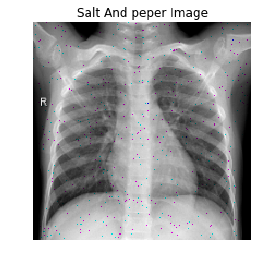

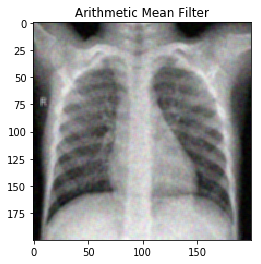

In [25]:
def ArithmeticMeanAlogrithmm(img):
    
    # Arithmetic mean filtering
    new_image = np.zeros(img.shape)
    img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            new_image[i-1,j-1] = np.mean(img[i-1:i+2,j-1:j+2])
    new_image = (new_image-np.min(img))*(255/np.max(img))
    return new_image.astype(np.uint8)
def spNoisy(image,s_vs_p = 0.5,amount = 0.004):
    # Salt and pepper noise
    out = np.copy(image)
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[tuple(coords)] = 1
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[tuple(coords)] = 0
    return out
spHouse = spNoisy(house)
plt.imshow(spHouse)
plt.axis("off")
plt.title("Salt And peper Image")
plt.show()  # The image after adding salt and pepper noise
plt.imshow(rgbArithmeticMean(GuassHouse))
#plt.imshow(rgbArithmeticMean(spHouse))
plt.title("Arithmetic Mean Filter")
plt.show()  # Arithmetic Mean Filter




--- Effects on S&P Noise Image with Probability 0.5 ---




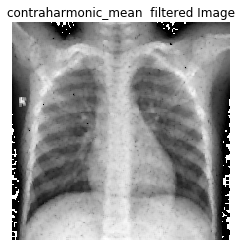

In [26]:
def contraharmonic_mean(img, size, Q):
    num = np.power(img, Q + 1)
    denom = np.power(img, Q)
    kernel = np.full(size, 1.0)
    result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
    ax = fig.add_subplot(5, 2, 10)
    plt.imshow( result, cmap = plt.cm.gray)
    plt.title('contraharmonic_mean  filtered Image'), plt.xticks([]), plt.yticks([])
    plt.axis("off")
    # show the images
    plt.show()
    return result

print("\n\n--- Effects on S&P Noise Image with Probability 0.5 ---\n\n")
contraharmonic_meanfilterimage=contraharmonic_mean(sp_05, (3,3), 0.5)



--- Effects on S&P Noise Image with Probability 0.5 ---




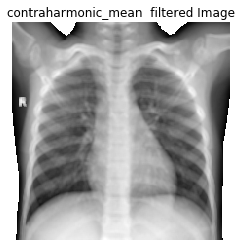

True

In [27]:
def bcontraharmonic_mean(img, size, Q):
    num = np.power(img, Q + 1)
    denom = np.power(img, Q)
    kernel = np.full(size, 1.0)
    result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
    ax = fig.add_subplot(5, 2, 10)
    plt.imshow( result, cmap = plt.cm.gray)
    plt.title('contraharmonic_mean  filtered Image'), plt.xticks([]), plt.yticks([])
    plt.axis("off")
    # show the images
    plt.show()
    return result

print("\n\n--- Effects on S&P Noise Image with Probability 0.5 ---\n\n")
bcontraharmonic_meanfilterimage=bcontraharmonic_mean(img, (3,3), 0.9)
bcontraharmonic_meanfilterimage.shape
cv2.imwrite('bcontraharmonic_meanfilterimage.png'.format(image), bcontraharmonic_meanfilterimage)

In [29]:
import skimage.measure     
entropyimg = skimage.measure.shannon_entropy(img)
entropysp_05 = skimage.measure.shannon_entropy(sp_05)
entropymidpointfilteredimage = skimage.measure.shannon_entropy(midpointfilteredimage)
bentropycontraharmonic_meanfilterimage = skimage.measure.shannon_entropy(contraharmonic_meanfilterimage)
entropycontraharmonic_meanfilterimage = skimage.measure.shannon_entropy(bcontraharmonic_meanfilterimage)
entropygausianimage = skimage.measure.shannon_entropy(gausianimage)
entropyArithmeticMeanAlogrithm = skimage.measure.shannon_entropy(ArithmeticMeanAlogrithm)

entropyGaussieNoisy = skimage.measure.shannon_entropy(GaussieNoisy)
entropyspNoisy = skimage.measure.shannon_entropy(spNoisy)

print("orginal image",entropyimg)
print("salt and paper noicy image",entropysp_05)
print("midpointfiltered image",entropymidpointfilteredimage)
print("contraharmonic_meanfiltered image",entropycontraharmonic_meanfilterimage)
print("bcontraharmonic_meanfiltered image",bentropycontraharmonic_meanfilterimage)
print("gausian filter image",entropygausianimage)
print("Arithmetic Mean filter image",entropyArithmeticMeanAlogrithm)

print("Gaussie Noisy",entropyGaussieNoisy)
print("spNoisy",entropyspNoisy)

orginal image 7.574456288067212
salt and paper noicy image 5.806273268900491
midpointfiltered image 7.603856922903086
contraharmonic_meanfiltered image 15.602786104748995
bcontraharmonic_meanfiltered image 15.260530353355279
gausian filter image 7.210479672516201
Arithmetic Mean filter image 0.0
Gaussie Noisy 0.0
spNoisy 0.0


In [30]:
import imquality.brisque as brisque
from skimage import io, img_as_float
img0 = img_as_float(img)
yi = cv2.imread('midpointfilteredimage.png', 0)
img1 = img_as_float(yi)


score0 = brisque.score(img0)
score1 = brisque.score(img1)

print("BRISQUE Score for 0 blur = ", score0)
print("BRISQUE Score for 1 blur = ", score1)

BRISQUE Score for 0 blur =  -0.3472783531588277
BRISQUE Score for 1 blur =  45.44661579307896


In [47]:
covid_dir = "D:/Final/resized/COVID/"
normal_dir = "D:/Final/resized/NORMAL/"

(224, 224, 3)


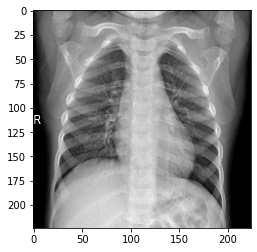

In [48]:
path = normal_dir + os.listdir(normal_dir)[10]
img = mpimg.imread(path)
print(img.shape)
plt.imshow(img, cmap='gray')

(224, 224, 3)
(224, 224, 3)


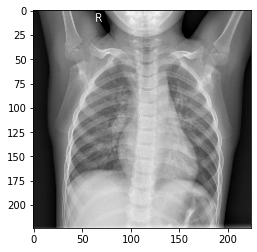

In [49]:
path = normal_dir + os.listdir(normal_dir)[0]
img = mpimg.imread(path)
plt.imshow(img, cmap='gray')
print(img.shape)
resized_img = cv2.resize(img, (224,224))
print(resized_img.shape)




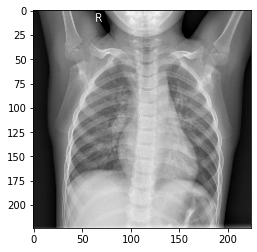

In [50]:
plt.imshow(resized_img, cmap='gray')

In [51]:
path = normal_dir + os.listdir(normal_dir)[0]
img = mpimg.imread(path)
resized_img = cv2.resize(img, (224,224))
print(resized_img.shape)

(224, 224, 3)


In [17]:

# Adding salt & pepper noise to an image
def add_salt_pepper(prob,img_gs):
    # Extract image dimensions
    row, col = img_gs.shape
    
    # Declare salt & pepper noise ratio
    s_vs_p = 0.5
    output = np.copy(img_gs)
    
    # Apply salt noise on each pixel individually
    num_salt = np.ceil(prob * img_gs.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in img_gs.shape]
    output[coords] = 1
    
    # Apply pepper noise on each pixel individually
    num_pepper = np.ceil(prob * img_gs.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in img_gs.shape]
    
    output[coords] = 0 
    return output




In [18]:
#filter for image
def use_contraharmonic_mean(img, size, Q):
    num = np.power(img, Q + 1)
    denom = np.power(img, Q)
    kernel = np.full(size, 1.0)
    result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
    return result

In [52]:
for image in range(len(os.listdir(covid_dir))):
    path = covid_dir+os.listdir(covid_dir)[image]
    img = cv2.imread(path,0)
    resized_image = cv2.resize(img, (224,224))
    #histequalized=histequalization(resized_image)
    histequalized=cv2.equalizeHist(resized_image)
    # Call salt & pepper function with probability = 0.5
    # on the grayscale image of rose
   # noicyimage = add_salt_pepper(0.5,resized_image)
    #contraharmonic_meanfilterimage=use_contraharmonic_mean(noicyimage, (3,3), 0.5)
    cv2.imwrite('Covid {}.png'.format(image), histequalized)

In [53]:
 for image in range(len(os.listdir(normal_dir))):
    path = normal_dir+os.listdir(normal_dir)[image]
    img = cv2.imread(path,0)
    resized_image = cv2.resize(img, (224,224))

#     histequalized=histequalization(resized_image)
    histequalized=cv2.equalizeHist(resized_image)
    # Call salt & pepper function with probability = 0.5
    # on the grayscale image of rose
    #noicyimage = add_salt_pepper(0.5,resized_image)
    #contraharmonic_meanfilterimage=use_contraharmonic_mean(noicyimage, (3,3), 0.5)
    cv2.imwrite('Normal {}.png'.format(image), histequalized)

In [54]:
os.mkdir('D:/Final/Histequalized')

In [55]:
os.mkdir('D:/Final/Histequalized/Normal')
os.mkdir('D:/Final/Histequalized/Covid')

In [56]:
for file in os.listdir(os.getcwd()):
    if file.split(' ')[0] == 'Normal':
        dest = shutil.move(file, 'D:/Final/Histequalized/Normal')
    elif file.split(' ')[0] == 'Covid':
        dest = shutil.move(file, 'D:/Final/Histequalized/Covid')
    else:
        dest = ""

# splitting data to train and test

In [2]:

root_dir = 'D:/Final/Histequalized/'
totalimages=0;
cls="covid"
src = root_dir + cls # Folder to copy images from
covidFileNames = os.listdir(src)
print("Covid images",len(covidFileNames))
totalimages=totalimages+len(covidFileNames)

root_dir = 'D:/Final/Histequalized/'
cls="normal"
src = root_dir + cls # Folder to copy images from
normalFileNames = os.listdir(src)
print("Normal Images",len(normalFileNames))
totalimages=totalimages+len(normalFileNames)

print("Total Images",totalimages)

Covid images 1200
Normal Images 1341
Total Images 2541


In [25]:
# # Creating Train / Val / Test folders (One time use)
 
root_dir = "D:/Test/histequalized1/" # data root path
classes_dir = ['covid', 'normal'] #total labels

test_ratio = 0.20
val_ratio = 0.01

for cls in classes_dir:
    os.makedirs(root_dir +'train/' + cls)
    os.makedirs(root_dir +'vald/' + cls)
    os.makedirs(root_dir +'test/' + cls)


    
totalimage=0
testimage=0
valimage=0
trainimage=0
sys.stdout.write("Spliting")
sys.stdout.write("    ")
for cls in classes_dir:
    # Creating partitions of the data after shuffeling
    src = root_dir + cls # Folder to copy images from
    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                       int(len(allFileNames)* (1 - test_ratio))])
    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
    totalimage=totalimage+len(allFileNames)
    trainimage=trainimage+len(train_FileNames)
    valimage=valimage+ len(val_FileNames)
    testimage=testimage+len(test_FileNames)
        
    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir +'train/' + cls)
        sys.stdout.write(".")
    for name in val_FileNames:
        shutil.copy(name, root_dir +'vald/' + cls)
        sys.stdout.write(".")
    for name in test_FileNames:
        shutil.copy(name, root_dir +'test/' + cls)
        sys.stdout.write(".")
        

print("")
print('Total images: ', totalimage)
print('Training: ',trainimage)
print('Validation: ', valimage)
print('Testing: ', testimage)

Spliting    ............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................